# Analisis Exploratorio de Datos de accidentes viales


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
homicidios = pd.read_excel('homicidios.xlsx', sheet_name=None)
lesiones=pd.read_excel('lesiones.xlsx',sheet_name=None)

Vamos a trabajar con homicidios por prioridad

In [3]:
pd.set_option('display.max_columns', None)

In [27]:
homicidios['HECHOS']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,tipodia
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,Día de semana
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,Fin de semana
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,Fin de semana
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,Fin de semana
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,Día de semana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,Día de semana
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,Día de semana
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,Día de semana
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,Día de semana


In [19]:
homicidios['HECHOS'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [77]:
homicidios['VICTIMAS']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [10]:
df_homicidio_hechos=homicidios['HECHOS']
df_homicidio_victimas=homicidios['VICTIMAS']

In [11]:
df_homicidio_hechos['tipodia'] = df_homicidio_hechos['FECHA'].apply(lambda x: 'Fin de semana' if x.weekday() >= 5 else 'Día de semana')

Revisar si hay duplicados

In [15]:
duplicados = df_homicidio_hechos[df_homicidio_hechos.duplicated()]

In [16]:
duplicados

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,tipodia


In [17]:
duplicados = df_homicidio_victimas[df_homicidio_victimas.duplicated()]

In [18]:
duplicados

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


Como no hay duplicados, Se prosigue y como datos nulos solo tengo columnmas como cruce o altura voy a trabajar con latitud y longitud una vez que verifique que estan en orden y tambien usare direccion normalizada 

In [19]:
import folium

In [12]:
df_homicidio_hechos['pos y'] = df_homicidio_hechos['pos y'].replace('.', np.nan)
df_homicidio_hechos['pos x'] = df_homicidio_hechos['pos x'].replace('.', np.nan)

In [13]:
#Cambio de tipo de dato
df_homicidio_hechos['pos y']=df_homicidio_hechos['pos y'].astype(float)
df_homicidio_hechos['pos x']=df_homicidio_hechos['pos x'].astype(float)

In [14]:
df_homicidio_hechos.dropna(subset=['pos y', 'pos x'], inplace=True)


In [33]:
default_latitude = 0.0  # Coordenada de latitud por defecto
default_longitude = 0.0  # Coordenada de longitud por defecto

df_homicidio_hechos['pos y'].fillna(default_latitude, inplace=True)
df_homicidio_hechos['pos x'].fillna(default_longitude, inplace=True)


In [34]:
m = folium.Map(location=[0, 0], zoom_start=2)  
for index, row in df_homicidio_hechos.iterrows():
    folium.Marker([row['pos y'], row['pos x']], tooltip=row['Dirección Normalizada']).add_to(m)

In [35]:
m.save('mapa.html')

In [36]:
df_homicidio_hechos['COMUNA'].value_counts()

COMUNA
1     90
4     73
9     71
8     65
7     59
3     45
15    44
13    39
12    37
11    32
14    32
10    29
2     25
5     22
6     21
Name: count, dtype: int64

In [74]:
comuna_1_accidentes = df_homicidio_hechos[df_homicidio_hechos['COMUNA'] == 15]


In [75]:
historico_accidentes_comuna_1 = comuna_1_accidentes['AAAA'].value_counts().sort_index()


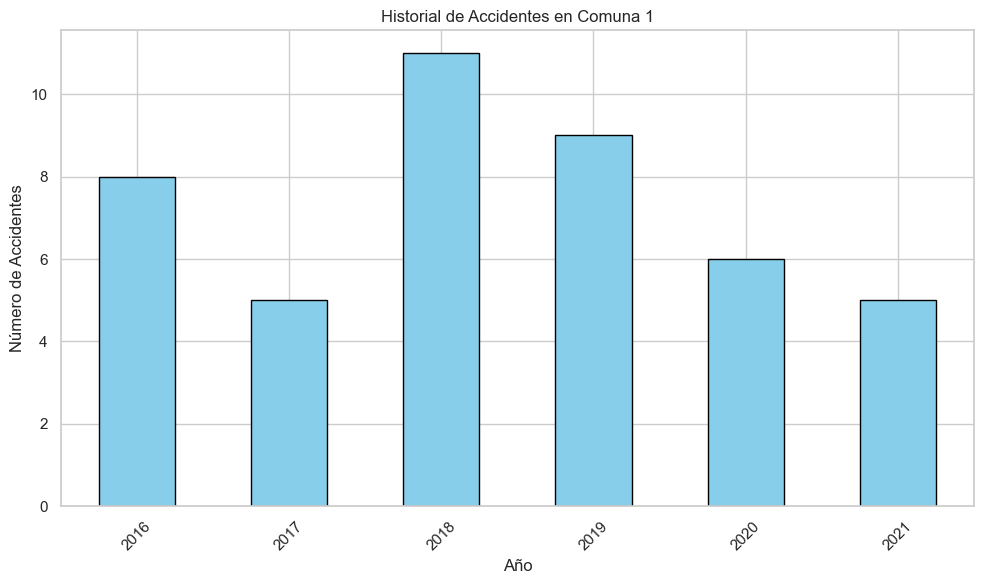

In [76]:
import matplotlib.pyplot as plt

# Configura el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crea el gráfico de barras
historico_accidentes_comuna_1.plot(kind='bar', color='skyblue', edgecolor='black')

# Personaliza el gráfico
plt.title('Historial de Accidentes en Comuna 1')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)

# Muestra el gráfico
plt.tight_layout()
plt.show()


5,6,9,13,14

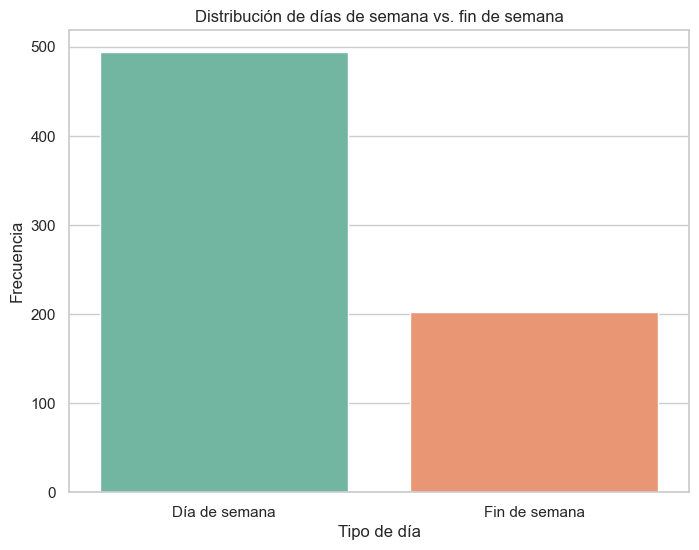

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_homicidio_hechos, x='tipodia', palette='Set2')
plt.title('Distribución de días de semana vs. fin de semana')
plt.xlabel('Tipo de día')
plt.ylabel('Frecuencia')
plt.show()

In [79]:
filtro_fallecidos_2020_2021 = (df_homicidio_victimas['AAAA'] >= 2020) & (df_homicidio_victimas['AAAA'] <= 2021)
fallecidos_2020_2021 = df_homicidio_victimas[filtro_fallecidos_2020_2021]

# Cuenta el número de fallecidos en cada año
conteo_fallecidos_por_año = fallecidos_2020_2021.groupby('AAAA')['VICTIMA'].count()

# Imprime el conteo de fallecidos por año
print(conteo_fallecidos_por_año)

AAAA
2020    81
2021    97
Name: VICTIMA, dtype: int64


In [81]:
fallecidos_2020_2021.value_counts()

ID_hecho   FECHA       AAAA  MM  DD  ROL                   VICTIMA    SEXO       EDAD  FECHA_FALLECIMIENTO
2020-0001  2020-01-04  2020  1   4   PEATON                PEATON     FEMENINO   87    2020-01-04             1
2021-0053  2021-06-20  2021  6   20  PEATON                PEATON     MASCULINO  58    2021-06-30             1
2021-0033  2021-04-14  2021  4   14  CONDUCTOR             AUTO       MASCULINO  33    2021-04-14             1
2021-0034  2021-04-19  2021  4   19  PASAJERO_ACOMPAÑANTE  MOTO       FEMENINO   26    2021-04-19             1
2021-0035  2021-05-03  2021  5   3   CONDUCTOR             MOTO       MASCULINO  24    2021-05-03             1
                                                                                                             ..
2020-0061  2020-12-03  2020  12  3   CONDUCTOR             MOTO       MASCULINO  45    2020-12-04             1
2020-0062  2020-12-04  2020  12  4   CICLISTA              BICICLETA  MASCULINO  47    2020-12-04            

In [85]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df_fallecidos
# con columnas 'victima' y 'AAAA'.

# Filtra los datos para incluir solo los registros de fallecidos entre 2020 y 2021
filtro_fallecidos_2020_2021 = (df_homicidio_victimas['AAAA'] >= 2020) & (df_homicidio_victimas['AAAA'] <= 2021)
fallecidos_2020_2021 = df_homicidio_victimas[filtro_fallecidos_2020_2021]

# Aplica un filtro adicional para seleccionar solo los fallecidos que fueron peatones
fallecidos_peatones_2020_2021 = fallecidos_2020_2021[fallecidos_2020_2021['VICTIMA'] == 'PEATON']

# Cuenta el número de fallecidos que fueron peatones en cada año
conteo_fallecidos_peatones_por_año = fallecidos_peatones_2020_2021.groupby('AAAA')['VICTIMA'].count()

# Imprime el conteo de fallecidos que fueron peatones por año
print(conteo_fallecidos_peatones_por_año)


AAAA
2020    35
2021    33
Name: VICTIMA, dtype: int64


In [27]:
nombre_columna={'pos x':'Longitud' ,'pos y':'Latitud' ,'ID':'ID_HECHO'}
df_homicidio_hechos=df_homicidio_hechos.rename(columns=nombre_columna)

In [23]:
df_homicidio_hechos.to_csv('homicidio_hecho.csv',index=False)
df_homicidio_victimas.to_csv('victimas.csv',index=False)

PermissionError: [Errno 13] Permission denied: 'homicidio_hecho.csv'

In [34]:
df_homicidio_hechos

,ID_HECHO,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,Calle,Altura,Cruce,COMUNA,Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,ENTRE RIOS AV.,2034.0,NaN,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.",1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,RIESTRA AV.,NaN,MOM,7,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,9,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,GAONA AV.,NaN,TERRADA,11,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,"PERON, EVA AV.",4071.0,NaN,9,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS


In [32]:
# Supongamos que tienes un DataFrame llamado df
columnas_a_eliminar = ['tipodia']

# Utiliza el método drop para eliminar las columnas
df_homicidio_hechos = df_homicidio_hechos.drop(columnas_a_eliminar, axis=1)

# El argumento axis=1 indica que estás eliminando columnas, no filas


In [35]:
df_homicidio_hechos.to_csv('homicidio_hecho1.csv',index=False)